In [53]:
import requests
import time
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [54]:
# This is your Dune API key it allows your script to connect securely to Dune's servers
API_KEY = ""

# This is the unique ID of the Dune query you want to run
QUERY_ID = 5085978

# These headers are included in the request so Dune knows it's coming from an authorized user
headers = {
    "X-Dune-API-Key": API_KEY,
}
# It's a custom HTTP header used to send your API key securely to Dune.

In [55]:
# Build the URL to tell Dune to run (execute) your saved query
exec_url = f"https://api.dune.com/api/v1/query/{QUERY_ID}/execute"

# Send a POST request to that URL with your API key in the headers
# This starts the query execution on Dune's servers
exec_response = requests.post(exec_url, headers=headers)

# Print the HTTP status code to see if the request was successful (200 means OK)
print(exec_response.status_code)

# Print the JSON response from Dune so we can see what's returned (like execution ID)
print(exec_response.json())  # Check this before proceeding

# Extract the "execution_id" from the response — this is used to check the status or get results
job_id = exec_response.json().get("execution_id")

200
{'execution_id': '01JTV63CPF5PVRT5Q899E4AQK6', 'state': 'QUERY_STATE_PENDING'}


In [56]:
# Build the URL to check the status of the running query using the execution ID (job_id)
status_url = f"https://api.dune.com/api/v1/execution/{job_id}/status"

# Keep checking the query status in a loop until it's done
while True:
    # Send a GET request to ask Dune for the current status of the query
    status_response = requests.get(status_url, headers=headers).json()

    # Print the current status so you can track progress
    print(f"Current status: {status_response['state']}")

    # If the query has finished running, break out of the loop
    if status_response["state"] == "QUERY_STATE_COMPLETED":
        break

    # Optional: show additional details if available (like execution ID or queue position)
    # print(status_response)  # Uncomment to see full response if needed

    # Wait 2 seconds before checking again
    time.sleep(2)


Current status: QUERY_STATE_PENDING
Current status: QUERY_STATE_PENDING
Current status: QUERY_STATE_PENDING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QUERY_STATE_EXECUTING
Current status: QU

In [57]:
# Build the URL to get the results of the completed query using the execution ID
results_url = f"https://api.dune.com/api/v1/execution/{job_id}/results"

# Send a request to get the actual data returned by the query
results = requests.get(results_url, headers=headers).json()

# Extract just the rows of data (the main table) from the JSON response
data = results["result"]["rows"]


In [58]:
# Turn our data into a table (called a DataFrame) so it’s easier to work with
df = pd.DataFrame(data)

# Show the first 5 rows of the table so we can quickly see what’s inside
df.head()

,block_time,eth_sent,from,gas_fee_eth,to,tx_hash
0,2023-10-07 20:19:47.000 UTC,1.000000e-07,0x9d8a62f656a8d1615c1294fd71e9cfb3e4855a4f,0.0001,0x7893984119e4b5854ef269a8246c5dca1e8afc5d,0x9c3ff9d4e5e3e75cc50ad2c97759b13cbbcea45273a4...
1,2020-01-28 18:13:20.000 UTC,0.000000e+00,0x9d8a62f656a8d1615c1294fd71e9cfb3e4855a4f,0.0000,0xc66ea802717bfb9833400264dd12c2bceaa34a6d,0xe6749663c157526b65bfac3a19cb32d4c3614a4749b7...
2,2020-01-28 18:13:20.000 UTC,0.000000e+00,0x9d8a62f656a8d1615c1294fd71e9cfb3e4855a4f,0.0000,0xc66ea802717bfb9833400264dd12c2bceaa34a6d,0xeb0974b855a92a88843b477597bebf0d4aa4ba2a8309...
3,2019-12-16 23:16:05.000 UTC,0.000000e+00,0x9d8a62f656a8d1615c1294fd71e9cfb3e4855a4f,0.0000,0x1dfabf381d80dd29d43bc347207b30a5c484bbd0,0x5dba2b2a2bdfd0637a7b5ab10a7ea393b960b8eb1661...
4,2019-12-16 23:16:05.000 UTC,0.000000e+00,0x9d8a62f656a8d1615c1294fd71e9cfb3e4855a4f,0.0000,0x0e69d0a2bbb30abcb7e5cfea0e4fde19c00a8d47,0xdb7a67485dec6aeec03ab6a206426024075ffd2c3c96...


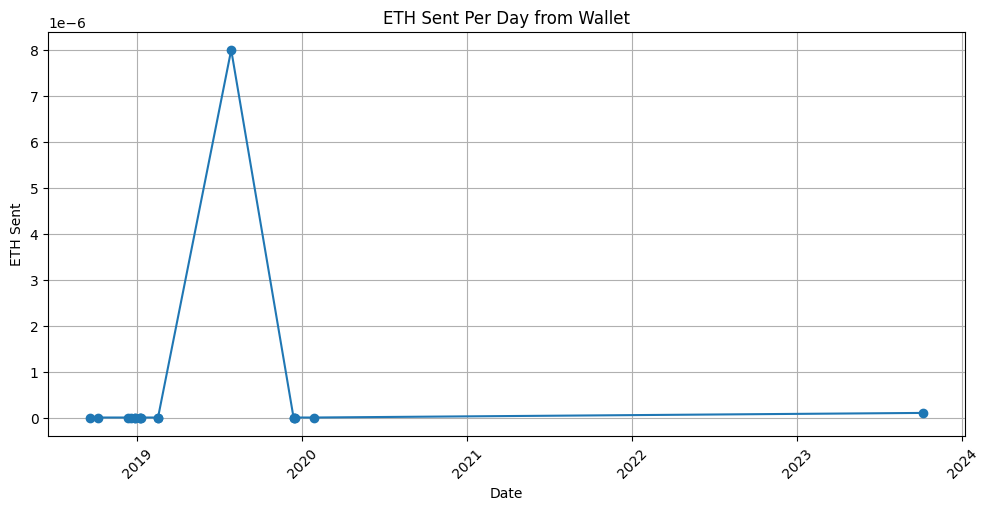

In [59]:
import matplotlib.pyplot as plt

# Convert 'block_time' column to datetime format if it's not already
df["block_time"] = pd.to_datetime(df["block_time"])

# Group the data by calendar day and sum the total ETH sent each day
daily_eth = df.groupby(df["block_time"].dt.date)["eth_sent"].sum()

# Set up the plot size
plt.figure(figsize=(10, 5))

# Plot a line chart of ETH sent per day with markers for each point
daily_eth.plot(kind="line", marker="o")

# Add a title to explain what the chart shows
plt.title("ETH Sent Per Day from Wallet")

# Label the x-axis and y-axis
plt.xlabel("Date")
plt.ylabel("ETH Sent")

# Add a grid for easier reading
plt.grid(True)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the final chart
plt.show()



# Summary:
# The x-axis represents calendar dates.
# The y-axis shows the total amount of ETH sent on each day.
# Each point on the line represents a day, with the line connecting days to show trends.
# Spikes indicate days with high ETH outflows, while flat or low points show little or no activity.
# This visualization helps answer:
# When was the wallet most active?
# Are there any patterns in sending behavior (e.g., regular transfers, sudden spikes)?
# How much ETH is typically sent out daily?


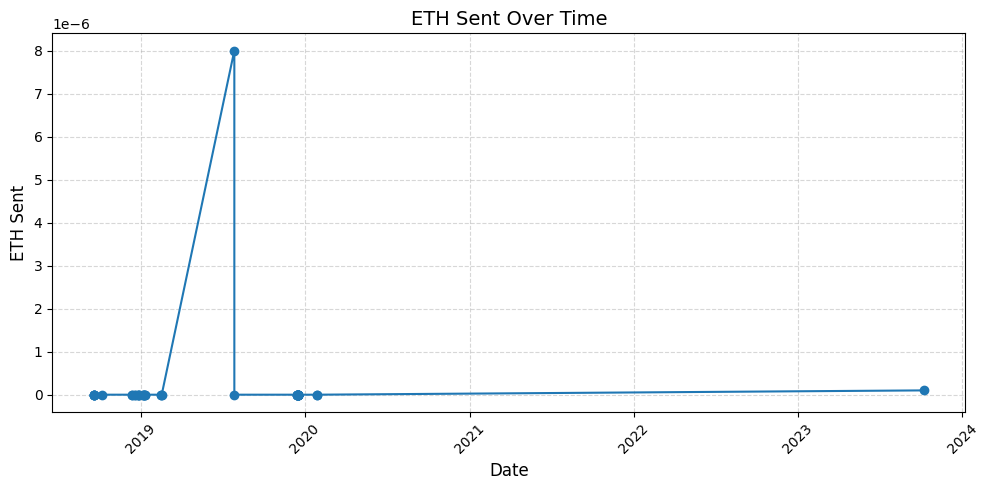

In [60]:
import matplotlib.pyplot as plt  # Import the plotting library
import pandas as pd              # Import pandas for handling data tables

# Convert the 'block_time' column to datetime format so we can plot it correctly
df['block_time'] = pd.to_datetime(df['block_time'])

# Sort the DataFrame by block time so the transactions appear in order
df_sorted = df.sort_values('block_time')

# Create a new figure for the plot and set its size
plt.figure(figsize=(10, 5))

# Plot ETH sent over time with circles as markers on each point
plt.plot(df_sorted['block_time'], df_sorted['eth_sent'], marker='o')

# Set the title of the plot
plt.title('ETH Sent Over Time', fontsize=14)

# Label the x-axis and y-axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('ETH Sent', fontsize=12)

# Add a light dashed grid for easier reading
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate the x-axis labels so the dates don't overlap
plt.xticks(rotation=45)

# Adjust spacing so nothing gets cut off
plt.tight_layout()

# Display the final plot
plt.show()

# ---------------------------------------------------------------
# Summary:
# This line chart shows how much ETH was sent from a specific wallet over time.
# - Each point represents one transaction.
# - The x-axis shows when each transaction occurred.
# - The y-axis shows how much ETH was sent in each transaction.
# This helps visualize activity patterns, high-volume transfers, and wallet behavior over time.


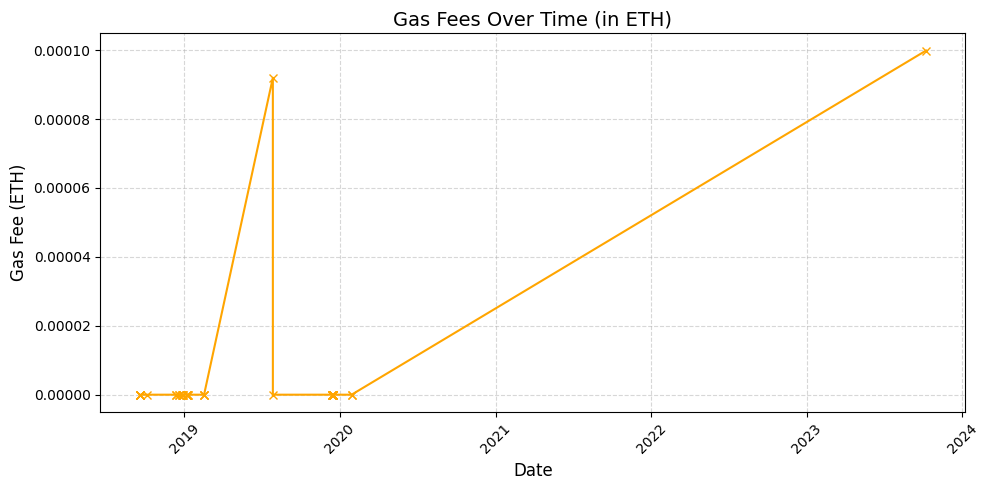

In [61]:
# Create a new figure for the plot and set its size to 10 inches wide by 5 inches tall
plt.figure(figsize=(10, 5))

# Plot gas fees over time
# - x-axis: block time (date of each transaction)
# - y-axis: gas fee in ETH
# - 'x' markers are used for each point, and the line is colored orange
plt.plot(df_sorted['block_time'], df_sorted['gas_fee_eth'], color='orange', marker='x')

# Set the title of the plot to explain what it shows
plt.title('Gas Fees Over Time (in ETH)', fontsize=14)

# Label the x-axis and y-axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gas Fee (ETH)', fontsize=12)

# Add a light dashed grid to make the chart easier to read
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate the x-axis labels to avoid overlapping text
plt.xticks(rotation=45)

# Automatically adjust layout so labels and titles don’t get cut off
plt.tight_layout()

# Show the final plot
plt.show()

# ---------------------------------------------------------------
# Summary:
# This chart shows how much gas (in ETH) was paid for each transaction over time.
# - Each point represents one transaction's gas fee.
# - The x-axis shows the date and time of the transaction.
# - The y-axis shows how much ETH was spent on gas for that transaction.
# It helps identify when gas costs were high, potentially signaling network congestion or complex transactions.


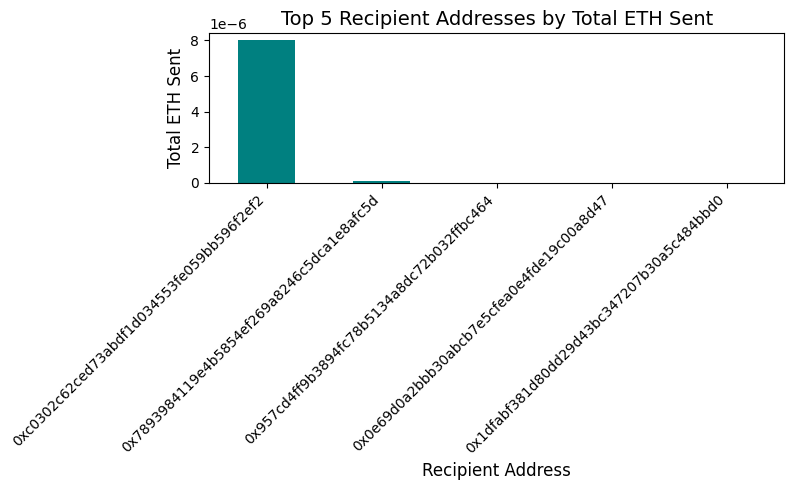

In [62]:
# Group the DataFrame by recipient address ('to') and sum up the total ETH sent to each address
top_recipients = df.groupby('to')['eth_sent'].sum()

# Sort the recipients by total ETH sent in descending order and keep only the top 5
top_recipients = top_recipients.sort_values(ascending=False).head(5)

# Create a new figure for the bar chart with a defined size
plt.figure(figsize=(8, 5))

# Plot a bar chart of the top 5 recipient addresses
# - Each bar represents one address
# - The height of each bar is the total ETH sent to that address
top_recipients.plot(kind='bar', color='teal')

# Set the title of the chart
plt.title('Top 5 Recipient Addresses by Total ETH Sent', fontsize=14)

# Label the x-axis and y-axis
plt.xlabel('Recipient Address', fontsize=12)
plt.ylabel('Total ETH Sent', fontsize=12)

# Rotate x-axis labels for better readability and align them to the right
plt.xticks(rotation=45, ha='right')

# Adjust layout so labels and titles are fully visible
plt.tight_layout()

# Show the final plot
plt.show()

# ---------------------------------------------------------------
# Summary:
# This bar chart shows the 5 addresses that received the most ETH from the wallet.
# - The x-axis lists recipient addresses.
# - The y-axis shows the total amount of ETH each received.
# This helps highlight where most of the wallet's ETH is going — useful for spotting key counterparties or patterns in transfer behavior.


In [63]:
from sklearn.ensemble import IsolationForest
# Import the Isolation Forest model from scikit-learn

# Select the numerical features we want to analyze: ETH sent and gas fee (both in ETH)
X = df[['eth_sent', 'gas_fee_eth']]  # These features help us detect unusual transactions

# Initialize the Isolation Forest model
# - contamination=0.1 means we expect ~10% of the data to be anomalies
# - random_state ensures reproducibility
model = IsolationForest(contamination=0.1, random_state=0)

# Fit the model to the data and predict anomalies
# -1 = anomaly, 1 = normal
df['is_anomaly'] = model.fit_predict(X)

# Show only the transactions flagged as   
df[df['is_anomaly'] == -1]


# Summary
# This machine learning code uses Isolation Forest, an unsupervised anomaly detection model, to 
# analyze Ethereum transactions.It looks at each transaction's ETH sent and gas fee to find patterns
# that are unusual or out of place. The model flags these as anomalies (marked with -1). This helps
# identify suspicious or rare transactions, which is useful for fraud detection,behavior analysis,
# or security auditing on the blockchain.

,block_time,eth_sent,from,gas_fee_eth,to,tx_hash,is_anomaly
0,2023-10-07 20:19:47+00:00,1.000000e-07,0x9d8a62f656a8d1615c1294fd71e9cfb3e4855a4f,0.000100,0x7893984119e4b5854ef269a8246c5dca1e8afc5d,0x9c3ff9d4e5e3e75cc50ad2c97759b13cbbcea45273a4...,-1
26,2019-07-28 00:27:46+00:00,8.000000e-06,0x9d8a62f656a8d1615c1294fd71e9cfb3e4855a4f,0.000092,0xc0302c62ced73abdf1d034553fe059bb596f2ef2,0xee4db1f69461189b8222b1dda7b17dd146d8d2aeee99...,-1
